In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tickbars

In [4]:
raw_data = pd.read_csv('ESU13_tickdata.csv')
data_indexed = raw_data.copy()
data_indexed['time'] = pd.to_datetime(data_indexed['time'], format='%m/%d/%Y %H:%M:%S.%f')

In [5]:
imbalance = tickbars.tick_rule(data_indexed['price'])
p_b_up = (imbalance.mean().item()+1)/2
print(p_b_up)

0.5038884176348081


In [6]:
volume = data_indexed['volume']
volume_imbalance = imbalance*volume
volume_up = np.mean([v for v in volume_imbalance if v > 0])
volume_down = -np.mean([v for v in volume_imbalance if v < 0])
print(volume_up, volume_down)

4.019840722741713 3.99696861519082


In [14]:
ties = tickbars.DollarVolumeRunsEvents(imbalance, volume, 100000, imbalance.mean().item(), volume_up, volume_down, 2*1e-5)

In [15]:
tick_imb_tevents = ties.get_events()

In [16]:
tick_imb_tevents['time'] = data_indexed.loc[tick_imb_tevents.index, 'time']
tick_imb_tevents['time'] = pd.to_datetime(tick_imb_tevents['time'], format='%m/%d/%Y %H:%M:%S.%f')
tick_imb_tevents

,threshold,time
tevent,,
127307,202555.118093,2013-09-03 07:13:20.013
210338,169279.037844,2013-09-03 09:04:40.574
303669,182807.316772,2013-09-03 10:23:55.940
399103,207498.292317,2013-09-03 11:49:54.314
508577,209853.581533,2013-09-03 14:00:02.230
588977,196857.519906,2013-09-03 15:05:09.034
714586,221828.013421,2013-09-04 08:58:41.814
798035,191994.471826,2013-09-04 10:28:15.123
887408,209601.802029,2013-09-04 13:03:39.311


In [18]:
statistics = pd.DataFrame({'value': ties.statistics, 'time': data_indexed.loc[ties.statistics.index, 'time']})

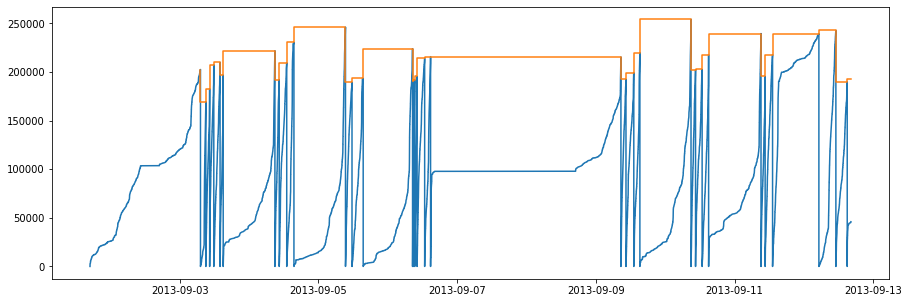

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(statistics['time'], statistics['value'])
plt.step(tick_imb_tevents['time'], tick_imb_tevents['threshold'], where='pre')
plt.show()

In [12]:
data_indexed['grp'] = 0
data_indexed.loc[tick_imb_tevents.index[:-1], 'grp'] = 1
data_indexed['grp'] = np.cumsum(data_indexed['grp'])
data_tick_vwap = tickbars.create_bars(data_indexed, 'grp', tickbars.compute_bar)

In [13]:
data_tick_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-03 07:13:20.013,1640.25,1649.00,1639.00,1643.75,399334,1645.227235,137599.930,127307
1,2013-09-03 09:04:40.574,1643.75,1650.00,1643.75,1646.50,325969,1647.458619,6680.561,83031
2,2013-09-03 10:23:55.940,1646.50,1648.75,1640.25,1640.75,350472,1645.415060,4755.366,93331
3,2013-09-03 11:49:54.314,1640.75,1641.50,1633.75,1634.75,395900,1637.972939,5158.374,95434
4,2013-09-03 14:00:02.230,1634.75,1635.50,1630.75,1635.00,405977,1633.521315,7807.916,109474
5,2013-09-03 15:05:09.034,1635.00,1639.50,1634.25,1637.75,368354,1637.226897,3906.804,80400
6,2013-09-04 08:58:41.814,1637.75,1643.75,1635.00,1642.50,436183,1638.815162,64412.780,125609
7,2013-09-04 10:28:15.123,1642.50,1649.75,1642.25,1649.00,364421,1646.805133,5373.309,83449
8,2013-09-04 13:03:39.311,1649.00,1654.75,1648.50,1652.25,412866,1652.253095,9324.188,89373
9,2013-09-04 15:33:20.295,1652.25,1654.25,1649.50,1654.00,430290,1651.781071,8980.984,98512


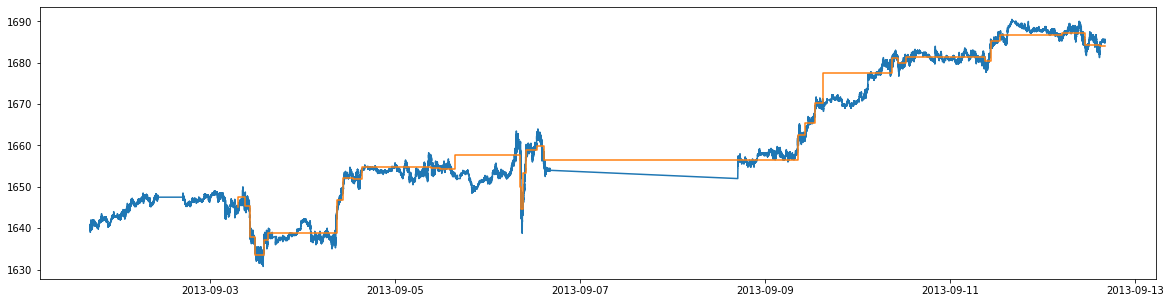

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(data_indexed.time, data_indexed.price)
plt.step(data_tick_vwap['time'], data_tick_vwap['vwap'], where='pre')
plt.show()